In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
import datetime as dt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


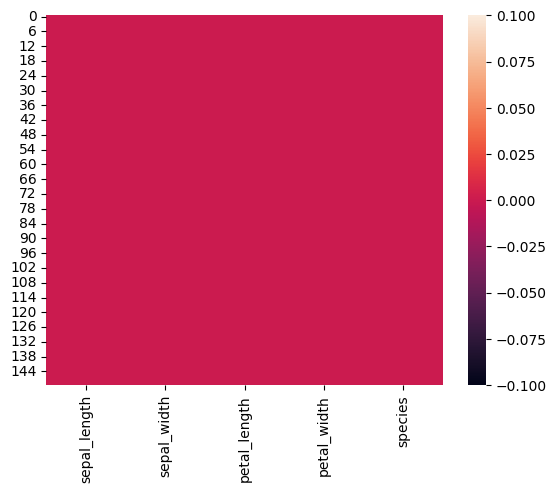

In [5]:
sns.heatmap(data.isna());

In [6]:
data.drop(['species'],axis=1,inplace=True)

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
scaler=StandardScaler()
data=scaler.fit_transform(data)

In [10]:
PC=PCA(n_components=3)

In [11]:
data=PC.fit_transform(data)

In [12]:
data

array([[-2.26470281,  0.4800266 ,  0.12770602],
       [-2.08096115, -0.67413356,  0.23460885],
       [-2.36422905, -0.34190802, -0.04420148],
       [-2.29938422, -0.59739451, -0.09129011],
       [-2.38984217,  0.64683538, -0.0157382 ],
       [-2.07563095,  1.48917752, -0.02696829],
       [-2.44402884,  0.0476442 , -0.3354704 ],
       [-2.23284716,  0.22314807,  0.0886955 ],
       [-2.33464048, -1.11532768, -0.14507686],
       [-2.18432817, -0.46901356,  0.25376557],
       [-2.1663101 ,  1.04369065,  0.2686811 ],
       [-2.32613087,  0.13307834, -0.09375924],
       [-2.2184509 , -0.72867617,  0.23091124],
       [-2.6331007 , -0.96150673, -0.18079608],
       [-2.1987406 ,  1.86005711,  0.472901  ],
       [-2.26221453,  2.68628449, -0.03052661],
       [-2.2075877 ,  1.48360936,  0.00534409],
       [-2.19034951,  0.48883832,  0.04421532],
       [-1.898572  ,  1.40501879,  0.37434327],
       [-2.34336905,  1.12784938, -0.13263047],
       [-1.914323  ,  0.40885571,  0.421

Text(0, 0.5, 'Euclidian Distance ')

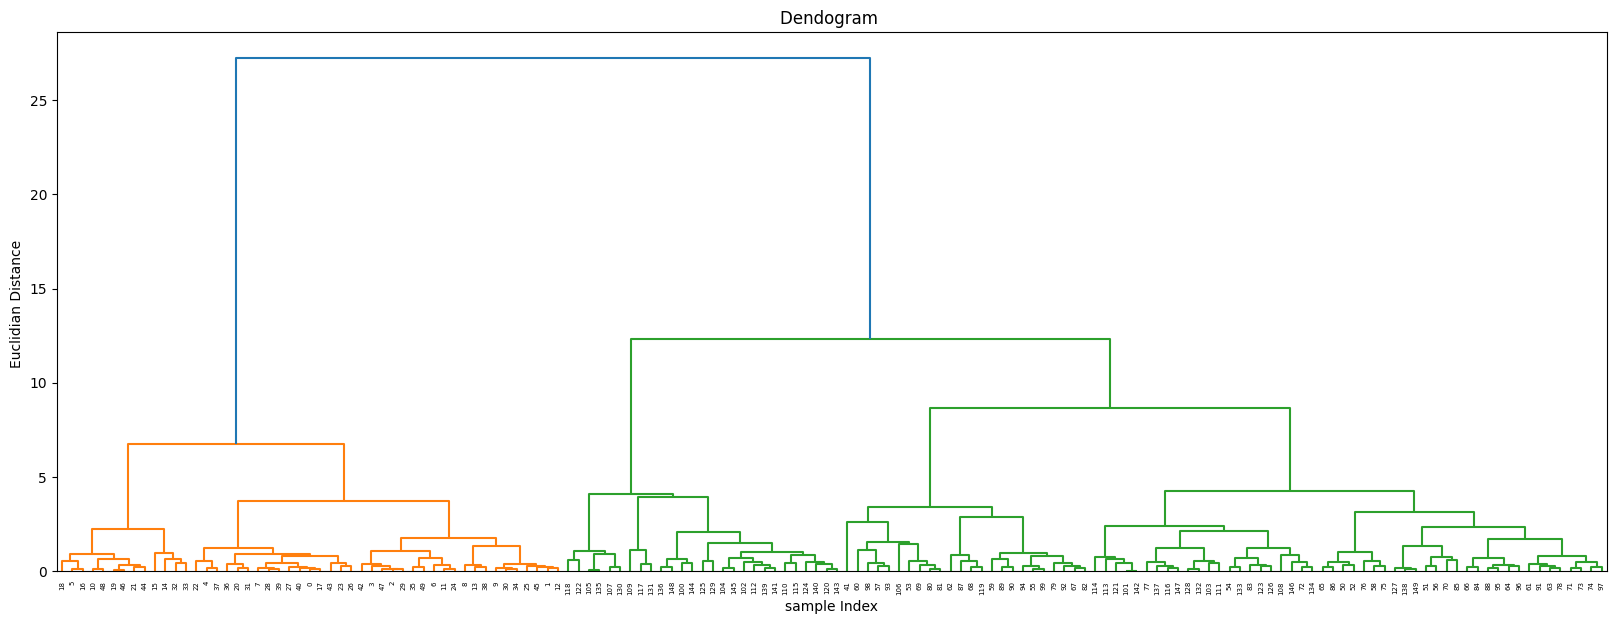

In [13]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))

sc.dendrogram(sc.linkage(data,method='ward'));
plt.title('Dendogram ')
plt.xlabel('sample Index')
plt.ylabel('Euclidian Distance ')

In [14]:
for i in range(2,11):
    cluster=AgglomerativeClustering(n_clusters=i,metric='euclidean',linkage='ward')
    cluster.fit_predict(data)
    from sklearn.metrics import silhouette_score
    print(silhouette_score(data,cluster.labels_))

0.5812357578501337
0.46042203590643377
0.4222751611367226
0.37180864668406344
0.3409668246873347
0.3488454881293062
0.36178537367520247
0.3272810432758633
0.3032464456796206


In [15]:
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')

In [16]:
data=pd.DataFrame(data)

In [17]:
data['label']=cluster.fit_predict(data)

In [18]:
data

,0,1,2,label
0,-2.264703,0.480027,0.127706,1
1,-2.080961,-0.674134,0.234609,1
2,-2.364229,-0.341908,-0.044201,1
3,-2.299384,-0.597395,-0.091290,1
4,-2.389842,0.646835,-0.015738,1
...,...,...,...,...
145,1.870503,0.386966,-0.256274,0
146,1.564580,-0.896687,0.026371,0
147,1.521170,0.269069,-0.180178,0
148,1.372788,1.011254,-0.933395,0


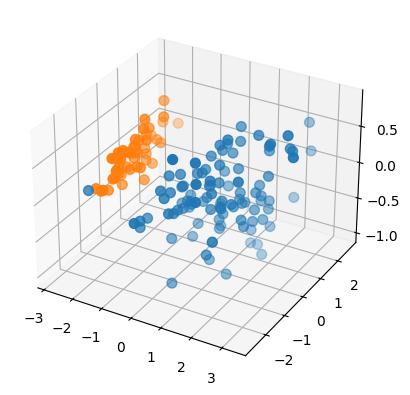

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data[0][data['label']==0], data[1][data['label']==0] , data[2][data['label']==0] , marker='o', s=50)
ax.scatter(data[0][data['label']==1], data[1][data['label']==1] , data[2][data['label']==1] , marker='o', s=50)